In [11]:
import sys
sys.path.insert(0,'..')

import numpy as np

import gym
import stable_baselines
from stable_baselines import A2C, ACER, ACKTR, DQN, DDPG, SAC, PPO1, PPO2, TD3, TRPO
from stable_baselines.common.env_checker import check_env
from stable_baselines.common.policies import MlpPolicy

from fakegym.fakegym import FakeGym
import importlib

In [12]:
class MyObservation():
    def __init__(self, env):
        self.env = env
        self.gps_actual = None
        self.gps_target = None
        self.distance = None
        self.touching = None

    def _update(self):
        self.gps_actual = self.env.state_object.gps_actual
        self.gps_target = self.env.state_object.gps_target
        self.distance = self.env.state_object.distance
        self.touching = self.env.state_object.touching

    def shape(self):
        """Make sure length is correct here.In this example:
        gps_actual: 2
        gps_target: 2
        distance:   4
        touching:   1
        =================
                   (9, )
        
        """
        return (4, )

    def get(self, env):
        """Get observation as numpy array."""
        self._update()
        
        arr = np.empty(0)
        arr = np.hstack((arr, np.array(self.gps_actual)))
        arr = np.hstack((arr, np.array(self.gps_target)))
#         arr = np.hstack((arr, np.array(self.distance)))
#         arr = np.hstack((arr, np.array(self.touching)))
        
        return arr
    

class MyEnv(FakeGym):
    def __init__(self, seed=None, N=10, num_of_sensors=4, obstacles_each=2,
                 step_range=(1, 1), action_type="discrete",
                 discrete_action_shaping="flatten", obs=MyObservation):
        super(MyEnv, self).__init__(seed, N, num_of_sensors, obstacles_each, step_range, action_type, discrete_action_shaping, obs)
        

    def calc_reward(self):
        """Calculate reward function.

        Idea(Mats):
        - negative reward for normal move so that james moves faster to goal
        - still lower negative reward if james gets closer to goal
        - high positive award for reaching it
        - high negative award to hitting a wall
        - epsilon only to divide never by 0

        """
        if self.gps_actual == self.gps_target:
            reward = 1000
        else:
            epsilon = 10**-5
            cost_step = 1
            distance = self.get_target_distance()+epsilon
            cost_distance = (distance**0.4)/(distance)
            reward_factor = -1
            reward = reward_factor * (cost_step * cost_distance)
            if self.state_object:
                reward = reward - 10
        return reward
        
        
    def check_done(self):
        if self.com.time_steps == 1000:
            return True
        if self.gps_actual == self.gps_target:
            return True
        return False


env = MyEnv(obstacles_each=0)
check_env(env)

/home/pj/anaconda3/envs/spinningup/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [13]:
time_steps = 10**5
model_name = "gps_only"

model = PPO1("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=time_steps, log_interval=100)
model.save("../models/keep/{}".format(model_name))
del model

********** Iteration 0 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00322 |      -0.01386 |      3.66e+04 |       0.00073 |       1.38564
     -0.01827 |      -0.01380 |      3.63e+04 |       0.00663 |       1.38004
     -0.02113 |      -0.01368 |      3.60e+04 |       0.01949 |       1.36763
     -0.02313 |      -0.01361 |      3.57e+04 |       0.02612 |       1.36119
Evaluating losses...
     -0.02509 |      -0.01363 |      3.55e+04 |       0.02377 |       1.36333
----------------------------------
| EpThisIter      | 0            |
| EpisodesSoFar   | 0            |
| TimeElapsed     | 0.722        |
| TimestepsSoFar  | 256          |
| ev_tdlam_before | 0.00639      |
| loss_ent        | 1.3633345    |
| loss_kl         | 0.02377293   |
| loss_pol_entpen | -0.013633344 |
| loss_pol_surr   | -0.025088191 |
| loss_vf_loss    | 35503.137    |
----------------------------------
********** Iteration 1 ************
Optim

     -0.00171 |      -0.01382 |      9.90e+04 |       0.00028 |       1.38158
     -0.01590 |      -0.01380 |      9.90e+04 |       0.00483 |       1.37960
     -0.01211 |      -0.01374 |      9.90e+04 |       0.01239 |       1.37442
     -0.01409 |      -0.01375 |      9.90e+04 |       0.01302 |       1.37452
Evaluating losses...
     -0.01965 |      -0.01377 |      9.90e+04 |       0.01020 |       1.37703
----------------------------------
| EpLenMean       | 174          |
| EpRewMean       | -1.08e+03    |
| EpThisIter      | 3            |
| EpisodesSoFar   | 13           |
| TimeElapsed     | 4.62         |
| TimestepsSoFar  | 2304         |
| ev_tdlam_before | -7.86e-05    |
| loss_ent        | 1.3770295    |
| loss_kl         | 0.010195323  |
| loss_pol_entpen | -0.013770295 |
| loss_pol_surr   | -0.019654509 |
| loss_vf_loss    | 99024.71     |
----------------------------------
********** Iteration 9 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |  

     -0.00064 |      -0.01217 |      3.21e+05 |       0.00234 |       1.21665
     -0.01638 |      -0.01203 |      3.21e+05 |       0.01198 |       1.20299
     -0.02855 |      -0.01180 |      3.20e+05 |       0.01432 |       1.17956
     -0.03393 |      -0.01158 |      3.19e+05 |       0.01184 |       1.15751
Evaluating losses...
     -0.03576 |      -0.01148 |      3.18e+05 |       0.01226 |       1.14822
----------------------------------
| EpLenMean       | 57.8         |
| EpRewMean       | 293          |
| EpThisIter      | 16           |
| EpisodesSoFar   | 75           |
| TimeElapsed     | 8.11         |
| TimestepsSoFar  | 4352         |
| ev_tdlam_before | -0.000161    |
| loss_ent        | 1.1482196    |
| loss_kl         | 0.012262637  |
| loss_pol_entpen | -0.011482195 |
| loss_pol_surr   | -0.03576368  |
| loss_vf_loss    | 318104.97    |
----------------------------------
********** Iteration 17 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss | 

     -0.00145 |      -0.00819 |      5.73e+05 |       0.00027 |       0.81945
     -0.01205 |      -0.00805 |      5.73e+05 |       0.00256 |       0.80461
     -0.02313 |      -0.00780 |      5.72e+05 |       0.00784 |       0.78046
     -0.03237 |      -0.00762 |      5.71e+05 |       0.01124 |       0.76155
Evaluating losses...
     -0.03461 |      -0.00751 |      5.71e+05 |       0.01394 |       0.75080
-----------------------------------
| EpLenMean       | 7.1           |
| EpRewMean       | 918           |
| EpThisIter      | 39            |
| EpisodesSoFar   | 292           |
| TimeElapsed     | 11.7          |
| TimestepsSoFar  | 6400          |
| ev_tdlam_before | -1.57e-05     |
| loss_ent        | 0.75080395    |
| loss_kl         | 0.01393857    |
| loss_pol_entpen | -0.0075080395 |
| loss_pol_surr   | -0.03461142   |
| loss_vf_loss    | 570880.6      |
-----------------------------------
********** Iteration 25 ************
Optimizing...
     pol_surr |    pol_entpen |   

********** Iteration 32 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00064 |      -0.00539 |      6.17e+05 |       0.00011 |       0.53901
     -0.00101 |      -0.00538 |      6.16e+05 |       0.00083 |       0.53790
     -0.00592 |      -0.00535 |      6.16e+05 |       0.00124 |       0.53469
     -0.00896 |      -0.00528 |      6.15e+05 |       0.00593 |       0.52799
Evaluating losses...
     -0.01015 |      -0.00526 |      6.15e+05 |       0.00857 |       0.52575
-----------------------------------
| EpLenMean       | 5.63          |
| EpRewMean       | 938           |
| EpThisIter      | 45            |
| EpisodesSoFar   | 623           |
| TimeElapsed     | 15.5          |
| TimestepsSoFar  | 8448          |
| ev_tdlam_before | -1.74e-05     |
| loss_ent        | 0.5257497     |
| loss_kl         | 0.008570358   |
| loss_pol_entpen | -0.0052574966 |
| loss_pol_surr   | -0.010149211  |
| loss_vf_loss    | 615067.1

********** Iteration 40 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00054 |      -0.00470 |      6.48e+05 |       0.00055 |       0.47013
     -0.00177 |      -0.00468 |      6.47e+05 |       0.00260 |       0.46781
     -0.00446 |      -0.00468 |      6.47e+05 |       0.00400 |       0.46761
     -0.00686 |      -0.00469 |      6.46e+05 |       0.00341 |       0.46883
Evaluating losses...
     -0.00910 |      -0.00470 |      6.46e+05 |       0.00336 |       0.47005
----------------------------------
| EpLenMean       | 5.23         |
| EpRewMean       | 943          |
| EpThisIter      | 54           |
| EpisodesSoFar   | 993          |
| TimeElapsed     | 19.1         |
| TimestepsSoFar  | 10496        |
| ev_tdlam_before | -8.34e-07    |
| loss_ent        | 0.47005197   |
| loss_kl         | 0.0033577257 |
| loss_pol_entpen | -0.00470052  |
| loss_pol_surr   | -0.009096287 |
| loss_vf_loss    | 646092.75    |
-----

********** Iteration 48 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00146 |      -0.00402 |      6.01e+05 |       0.00076 |       0.40213
     -0.00459 |      -0.00398 |      6.00e+05 |       0.00696 |       0.39824
     -0.00981 |      -0.00393 |      6.00e+05 |       0.00988 |       0.39317
     -0.01350 |      -0.00395 |      6.00e+05 |       0.00526 |       0.39481
Evaluating losses...
     -0.01527 |      -0.00398 |      5.99e+05 |       0.00327 |       0.39753
-----------------------------------
| EpLenMean       | 5.78          |
| EpRewMean       | 937           |
| EpThisIter      | 46            |
| EpisodesSoFar   | 1352          |
| TimeElapsed     | 22.8          |
| TimestepsSoFar  | 12544         |
| ev_tdlam_before | -1.04e-05     |
| loss_ent        | 0.39753252    |
| loss_kl         | 0.0032653767  |
| loss_pol_entpen | -0.0039753253 |
| loss_pol_surr   | -0.0152699165 |
| loss_vf_loss    | 599348.9

********** Iteration 56 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00128 |      -0.00446 |      5.72e+05 |       0.00014 |       0.44590
     5.49e-05 |      -0.00446 |      5.72e+05 |       0.00044 |       0.44564
     -0.00294 |      -0.00444 |      5.71e+05 |       0.00069 |       0.44441
     -0.00116 |      -0.00444 |      5.71e+05 |       0.00126 |       0.44365
Evaluating losses...
     -0.00625 |      -0.00443 |      5.71e+05 |       0.00190 |       0.44341
-----------------------------------
| EpLenMean       | 5.81          |
| EpRewMean       | 937           |
| EpThisIter      | 45            |
| EpisodesSoFar   | 1704          |
| TimeElapsed     | 26.7          |
| TimestepsSoFar  | 14592         |
| ev_tdlam_before | -3.46e-06     |
| loss_ent        | 0.44341397    |
| loss_kl         | 0.0018959304  |
| loss_pol_entpen | -0.0044341395 |
| loss_pol_surr   | -0.00625431   |
| loss_vf_loss    | 570650.5

********** Iteration 64 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00079 |      -0.00370 |      5.77e+05 |       0.00027 |       0.36962
     -0.00323 |      -0.00368 |      5.76e+05 |       0.00266 |       0.36809
     -0.00785 |      -0.00368 |      5.76e+05 |       0.00662 |       0.36787
     -0.01187 |      -0.00369 |      5.76e+05 |       0.00682 |       0.36920
Evaluating losses...
     -0.01515 |      -0.00369 |      5.76e+05 |       0.00565 |       0.36866
-----------------------------------
| EpLenMean       | 5.36          |
| EpRewMean       | 943           |
| EpThisIter      | 47            |
| EpisodesSoFar   | 2089          |
| TimeElapsed     | 30.6          |
| TimestepsSoFar  | 16640         |
| ev_tdlam_before | -4.77e-07     |
| loss_ent        | 0.36865985    |
| loss_kl         | 0.0056490423  |
| loss_pol_entpen | -0.0036865987 |
| loss_pol_surr   | -0.01515297   |
| loss_vf_loss    | 575506.0

********** Iteration 72 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00252 |      -0.00450 |      5.53e+05 |       0.00028 |       0.45043
     -0.00376 |      -0.00452 |      5.53e+05 |       0.00208 |       0.45162
     -0.01105 |      -0.00451 |      5.53e+05 |       0.00705 |       0.45057
     -0.01170 |      -0.00446 |      5.52e+05 |       0.00780 |       0.44591
Evaluating losses...
     -0.01218 |      -0.00444 |      5.52e+05 |       0.00666 |       0.44353
-----------------------------------
| EpLenMean       | 5.69          |
| EpRewMean       | 938           |
| EpThisIter      | 42            |
| EpisodesSoFar   | 2461          |
| TimeElapsed     | 35.6          |
| TimestepsSoFar  | 18688         |
| ev_tdlam_before | -6.44e-06     |
| loss_ent        | 0.4435278     |
| loss_kl         | 0.006664681   |
| loss_pol_entpen | -0.0044352775 |
| loss_pol_surr   | -0.0121815065 |
| loss_vf_loss    | 552005.7

********** Iteration 80 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00034 |      -0.00370 |      5.60e+05 |       0.00014 |       0.37032
     -0.00277 |      -0.00371 |      5.60e+05 |       0.00244 |       0.37106
     -0.00526 |      -0.00370 |      5.59e+05 |       0.00508 |       0.36983
     -0.00961 |      -0.00367 |      5.59e+05 |       0.00465 |       0.36742
Evaluating losses...
     -0.01128 |      -0.00366 |      5.59e+05 |       0.00437 |       0.36594
-----------------------------------
| EpLenMean       | 4.91          |
| EpRewMean       | 949           |
| EpThisIter      | 49            |
| EpisodesSoFar   | 2842          |
| TimeElapsed     | 40.8          |
| TimestepsSoFar  | 20736         |
| ev_tdlam_before | 3.58e-07      |
| loss_ent        | 0.36593783    |
| loss_kl         | 0.004370631   |
| loss_pol_entpen | -0.0036593783 |
| loss_pol_surr   | -0.011277154  |
| loss_vf_loss    | 558742.0

********** Iteration 88 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00065 |      -0.00411 |      5.30e+05 |       0.00053 |       0.41062
     -0.00193 |      -0.00410 |      5.30e+05 |       0.00332 |       0.40973
     -0.00347 |      -0.00406 |      5.30e+05 |       0.00546 |       0.40614
     -0.00561 |      -0.00408 |      5.29e+05 |       0.00362 |       0.40757
Evaluating losses...
     -0.00740 |      -0.00410 |      5.29e+05 |       0.00241 |       0.41007
-----------------------------------
| EpLenMean       | 5.97          |
| EpRewMean       | 935           |
| EpThisIter      | 41            |
| EpisodesSoFar   | 3212          |
| TimeElapsed     | 45.4          |
| TimestepsSoFar  | 22784         |
| ev_tdlam_before | 2.98e-06      |
| loss_ent        | 0.41007322    |
| loss_kl         | 0.0024112382  |
| loss_pol_entpen | -0.004100732  |
| loss_pol_surr   | -0.0074021593 |
| loss_vf_loss    | 529177.1

********** Iteration 96 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00191 |      -0.00404 |      5.50e+05 |       0.00024 |       0.40397
     -0.00093 |      -0.00405 |      5.49e+05 |       0.00203 |       0.40472
     -0.00417 |      -0.00405 |      5.49e+05 |       0.00222 |       0.40518
     -0.00109 |      -0.00405 |      5.49e+05 |       0.00290 |       0.40500
Evaluating losses...
     -0.00543 |      -0.00405 |      5.49e+05 |       0.00346 |       0.40538
-----------------------------------
| EpLenMean       | 5.24          |
| EpRewMean       | 944           |
| EpThisIter      | 49            |
| EpisodesSoFar   | 3599          |
| TimeElapsed     | 50.3          |
| TimestepsSoFar  | 24832         |
| ev_tdlam_before | -4.05e-06     |
| loss_ent        | 0.40537977    |
| loss_kl         | 0.0034603197  |
| loss_pol_entpen | -0.0040537976 |
| loss_pol_surr   | -0.0054316465 |
| loss_vf_loss    | 548654.5

********** Iteration 104 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00012 |      -0.00400 |      5.48e+05 |       0.00013 |       0.39962
     -0.00180 |      -0.00399 |      5.48e+05 |       0.00133 |       0.39893
     -0.00450 |      -0.00398 |      5.48e+05 |       0.00196 |       0.39821
     -0.00669 |      -0.00396 |      5.47e+05 |       0.00233 |       0.39614
Evaluating losses...
     -0.00871 |      -0.00396 |      5.47e+05 |       0.00315 |       0.39617
----------------------------------
| EpLenMean       | 5.44         |
| EpRewMean       | 942          |
| EpThisIter      | 49           |
| EpisodesSoFar   | 3998         |
| TimeElapsed     | 54.9         |
| TimestepsSoFar  | 26880        |
| ev_tdlam_before | 4.77e-07     |
| loss_ent        | 0.3961721    |
| loss_kl         | 0.0031504515 |
| loss_pol_entpen | -0.003961721 |
| loss_pol_surr   | -0.008713283 |
| loss_vf_loss    | 547092.1     |
----

********** Iteration 112 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00069 |      -0.00425 |      5.23e+05 |       0.00055 |       0.42451
    -7.13e-05 |      -0.00424 |      5.23e+05 |       0.00157 |       0.42440
     -0.00093 |      -0.00424 |      5.22e+05 |       0.00163 |       0.42445
     -0.00347 |      -0.00427 |      5.22e+05 |       0.00196 |       0.42657
Evaluating losses...
     -0.00493 |      -0.00427 |      5.22e+05 |       0.00236 |       0.42733
-----------------------------------
| EpLenMean       | 5.43          |
| EpRewMean       | 942           |
| EpThisIter      | 46            |
| EpisodesSoFar   | 4382          |
| TimeElapsed     | 59.3          |
| TimestepsSoFar  | 28928         |
| ev_tdlam_before | -3.58e-07     |
| loss_ent        | 0.42732728    |
| loss_kl         | 0.0023612706  |
| loss_pol_entpen | -0.004273273  |
| loss_pol_surr   | -0.0049285665 |
| loss_vf_loss    | 521855.

********** Iteration 120 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -8.96e-05 |      -0.00389 |      5.30e+05 |       0.00013 |       0.38872
     -0.00122 |      -0.00390 |      5.30e+05 |       0.00067 |       0.38978
     -0.00479 |      -0.00389 |      5.30e+05 |       0.00169 |       0.38942
     -0.00754 |      -0.00389 |      5.30e+05 |       0.00409 |       0.38893
Evaluating losses...
     -0.00902 |      -0.00388 |      5.30e+05 |       0.00635 |       0.38770
----------------------------------
| EpLenMean       | 5.4          |
| EpRewMean       | 942          |
| EpThisIter      | 49           |
| EpisodesSoFar   | 4745         |
| TimeElapsed     | 64.1         |
| TimestepsSoFar  | 30976        |
| ev_tdlam_before | -2.26e-06    |
| loss_ent        | 0.38770038   |
| loss_kl         | 0.0063522663 |
| loss_pol_entpen | -0.003877004 |
| loss_pol_surr   | -0.009024812 |
| loss_vf_loss    | 529509.56    |
----

********** Iteration 128 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00101 |      -0.00334 |      5.12e+05 |       0.00023 |       0.33397
     -0.00478 |      -0.00332 |      5.12e+05 |       0.00203 |       0.33179
     -0.00669 |      -0.00330 |      5.12e+05 |       0.00279 |       0.32958
     -0.00950 |      -0.00327 |      5.12e+05 |       0.00290 |       0.32730
Evaluating losses...
     -0.01098 |      -0.00326 |      5.11e+05 |       0.00313 |       0.32644
-----------------------------------
| EpLenMean       | 5.41          |
| EpRewMean       | 942           |
| EpThisIter      | 45            |
| EpisodesSoFar   | 5127          |
| TimeElapsed     | 68.7          |
| TimestepsSoFar  | 33024         |
| ev_tdlam_before | -3.58e-06     |
| loss_ent        | 0.3264384     |
| loss_kl         | 0.003133232   |
| loss_pol_entpen | -0.0032643839 |
| loss_pol_surr   | -0.010979933  |
| loss_vf_loss    | 511400.

********** Iteration 136 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00011 |      -0.00368 |      5.28e+05 |      3.48e-05 |       0.36819
     -0.00117 |      -0.00366 |      5.28e+05 |       0.00049 |       0.36630
     -0.00509 |      -0.00365 |      5.28e+05 |       0.00142 |       0.36495
     -0.00505 |      -0.00364 |      5.28e+05 |       0.00394 |       0.36376
Evaluating losses...
     -0.00704 |      -0.00363 |      5.27e+05 |       0.00487 |       0.36338
-----------------------------------
| EpLenMean       | 5.62          |
| EpRewMean       | 939           |
| EpThisIter      | 49            |
| EpisodesSoFar   | 5501          |
| TimeElapsed     | 72.9          |
| TimestepsSoFar  | 35072         |
| ev_tdlam_before | -5.96e-07     |
| loss_ent        | 0.3633768     |
| loss_kl         | 0.004870349   |
| loss_pol_entpen | -0.0036337678 |
| loss_pol_surr   | -0.0070352107 |
| loss_vf_loss    | 527463.

********** Iteration 144 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00056 |      -0.00431 |      4.95e+05 |       0.00018 |       0.43072
     -0.00335 |      -0.00430 |      4.95e+05 |       0.00142 |       0.42963
     -0.00461 |      -0.00429 |      4.95e+05 |       0.00318 |       0.42898
     -0.00520 |      -0.00429 |      4.94e+05 |       0.00376 |       0.42902
Evaluating losses...
     -0.00693 |      -0.00430 |      4.94e+05 |       0.00385 |       0.42999
-----------------------------------
| EpLenMean       | 5.33          |
| EpRewMean       | 943           |
| EpThisIter      | 48            |
| EpisodesSoFar   | 5886          |
| TimeElapsed     | 76.9          |
| TimestepsSoFar  | 37120         |
| ev_tdlam_before | -2.86e-06     |
| loss_ent        | 0.42998943    |
| loss_kl         | 0.0038518335  |
| loss_pol_entpen | -0.004299894  |
| loss_pol_surr   | -0.0069319457 |
| loss_vf_loss    | 494296.

********** Iteration 152 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00034 |      -0.00377 |      5.08e+05 |      3.80e-05 |       0.37713
     -0.00373 |      -0.00378 |      5.08e+05 |       0.00040 |       0.37826
     -0.00663 |      -0.00381 |      5.07e+05 |       0.00226 |       0.38091
     -0.00675 |      -0.00383 |      5.07e+05 |       0.00463 |       0.38286
Evaluating losses...
     -0.00686 |      -0.00383 |      5.07e+05 |       0.00567 |       0.38329
-----------------------------------
| EpLenMean       | 5.18          |
| EpRewMean       | 945           |
| EpThisIter      | 50            |
| EpisodesSoFar   | 6278          |
| TimeElapsed     | 81.2          |
| TimestepsSoFar  | 39168         |
| ev_tdlam_before | -1.79e-06     |
| loss_ent        | 0.3832931     |
| loss_kl         | 0.005666362   |
| loss_pol_entpen | -0.003832931  |
| loss_pol_surr   | -0.0068640215 |
| loss_vf_loss    | 507139.

********** Iteration 160 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00069 |      -0.00368 |      5.18e+05 |       0.00017 |       0.36750
     -0.00385 |      -0.00368 |      5.18e+05 |       0.00181 |       0.36828
     -0.00513 |      -0.00369 |      5.18e+05 |       0.00373 |       0.36860
     -0.00694 |      -0.00370 |      5.18e+05 |       0.00480 |       0.36966
Evaluating losses...
     -0.00928 |      -0.00371 |      5.17e+05 |       0.00507 |       0.37102
----------------------------------
| EpLenMean       | 5.22         |
| EpRewMean       | 945          |
| EpThisIter      | 53           |
| EpisodesSoFar   | 6670         |
| TimeElapsed     | 85.2         |
| TimestepsSoFar  | 41216        |
| ev_tdlam_before | 6.56e-07     |
| loss_ent        | 0.37102214   |
| loss_kl         | 0.0050666193 |
| loss_pol_entpen | -0.003710221 |
| loss_pol_surr   | -0.009278538 |
| loss_vf_loss    | 517499.25    |
----

********** Iteration 168 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00066 |      -0.00392 |      4.78e+05 |      7.58e-05 |       0.39173
     -0.00175 |      -0.00392 |      4.78e+05 |       0.00050 |       0.39182
     -0.00452 |      -0.00393 |      4.77e+05 |       0.00177 |       0.39340
     -0.00729 |      -0.00394 |      4.77e+05 |       0.00320 |       0.39398
Evaluating losses...
     -0.00829 |      -0.00393 |      4.77e+05 |       0.00373 |       0.39344
-----------------------------------
| EpLenMean       | 5.16          |
| EpRewMean       | 945           |
| EpThisIter      | 46            |
| EpisodesSoFar   | 7066          |
| TimeElapsed     | 89.1          |
| TimestepsSoFar  | 43264         |
| ev_tdlam_before | -2.62e-06     |
| loss_ent        | 0.39344323    |
| loss_kl         | 0.0037305125  |
| loss_pol_entpen | -0.0039344323 |
| loss_pol_surr   | -0.008286923  |
| loss_vf_loss    | 477146.

********** Iteration 176 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00032 |      -0.00345 |      4.93e+05 |       0.00017 |       0.34485
     -0.00121 |      -0.00344 |      4.93e+05 |       0.00081 |       0.34435
     -0.00156 |      -0.00341 |      4.92e+05 |       0.00174 |       0.34094
     -0.00294 |      -0.00341 |      4.92e+05 |       0.00226 |       0.34069
Evaluating losses...
     -0.00370 |      -0.00341 |      4.92e+05 |       0.00229 |       0.34120
-----------------------------------
| EpLenMean       | 5.12          |
| EpRewMean       | 946           |
| EpThisIter      | 49            |
| EpisodesSoFar   | 7469          |
| TimeElapsed     | 93            |
| TimestepsSoFar  | 45312         |
| ev_tdlam_before | -8.34e-07     |
| loss_ent        | 0.34119657    |
| loss_kl         | 0.0022917073  |
| loss_pol_entpen | -0.003411966  |
| loss_pol_surr   | -0.0037004962 |
| loss_vf_loss    | 492077.

********** Iteration 184 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00023 |      -0.00351 |      4.71e+05 |      1.75e-05 |       0.35084
     -0.00343 |      -0.00352 |      4.71e+05 |       0.00022 |       0.35215
     -0.00530 |      -0.00355 |      4.70e+05 |       0.00107 |       0.35458
     -0.00691 |      -0.00357 |      4.70e+05 |       0.00189 |       0.35655
Evaluating losses...
     -0.00843 |      -0.00358 |      4.70e+05 |       0.00224 |       0.35760
----------------------------------
| EpLenMean       | 5.21         |
| EpRewMean       | 945          |
| EpThisIter      | 49           |
| EpisodesSoFar   | 7852         |
| TimeElapsed     | 96.7         |
| TimestepsSoFar  | 47360        |
| ev_tdlam_before | -1.19e-07    |
| loss_ent        | 0.3576002    |
| loss_kl         | 0.002240801  |
| loss_pol_entpen | -0.003576002 |
| loss_pol_surr   | -0.008431796 |
| loss_vf_loss    | 470143.3     |
----

********** Iteration 192 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     6.75e-05 |      -0.00329 |      4.79e+05 |      6.95e-05 |       0.32927
     -0.00108 |      -0.00328 |      4.79e+05 |       0.00045 |       0.32836
     -0.00391 |      -0.00326 |      4.78e+05 |       0.00119 |       0.32645
     -0.00544 |      -0.00324 |      4.78e+05 |       0.00202 |       0.32407
Evaluating losses...
     -0.00582 |      -0.00323 |      4.78e+05 |       0.00251 |       0.32292
-----------------------------------
| EpLenMean       | 5.46          |
| EpRewMean       | 942           |
| EpThisIter      | 49            |
| EpisodesSoFar   | 8228          |
| TimeElapsed     | 101           |
| TimestepsSoFar  | 49408         |
| ev_tdlam_before | -1.19e-07     |
| loss_ent        | 0.32292372    |
| loss_kl         | 0.002506802   |
| loss_pol_entpen | -0.003229237  |
| loss_pol_surr   | -0.0058160573 |
| loss_vf_loss    | 478050.

********** Iteration 200 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00114 |      -0.00402 |      4.66e+05 |      5.19e-05 |       0.40181
     6.73e-05 |      -0.00403 |      4.66e+05 |       0.00025 |       0.40315
     -0.00085 |      -0.00404 |      4.66e+05 |       0.00090 |       0.40418
     -0.00135 |      -0.00405 |      4.66e+05 |       0.00151 |       0.40543
Evaluating losses...
     -0.00340 |      -0.00406 |      4.65e+05 |       0.00163 |       0.40560
-----------------------------------
| EpLenMean       | 5.19          |
| EpRewMean       | 945           |
| EpThisIter      | 47            |
| EpisodesSoFar   | 8626          |
| TimeElapsed     | 104           |
| TimestepsSoFar  | 51456         |
| ev_tdlam_before | -1.79e-06     |
| loss_ent        | 0.40560007    |
| loss_kl         | 0.0016346064  |
| loss_pol_entpen | -0.0040560006 |
| loss_pol_surr   | -0.0033988403 |
| loss_vf_loss    | 465399.

********** Iteration 208 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -1.08e-05 |      -0.00379 |      4.60e+05 |      5.39e-05 |       0.37900
     -0.00379 |      -0.00379 |      4.60e+05 |       0.00054 |       0.37880
     -0.00705 |      -0.00379 |      4.60e+05 |       0.00170 |       0.37868
     -0.00818 |      -0.00378 |      4.60e+05 |       0.00297 |       0.37802
Evaluating losses...
     -0.00821 |      -0.00378 |      4.60e+05 |       0.00331 |       0.37764
-----------------------------------
| EpLenMean       | 5.27          |
| EpRewMean       | 944           |
| EpThisIter      | 47            |
| EpisodesSoFar   | 9004          |
| TimeElapsed     | 108           |
| TimestepsSoFar  | 53504         |
| ev_tdlam_before | -7.15e-07     |
| loss_ent        | 0.37764025    |
| loss_kl         | 0.003312368   |
| loss_pol_entpen | -0.0037764027 |
| loss_pol_surr   | -0.008208881  |
| loss_vf_loss    | 459619.

********** Iteration 216 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00045 |      -0.00395 |      4.48e+05 |      4.82e-05 |       0.39526
     -0.00205 |      -0.00395 |      4.48e+05 |       0.00102 |       0.39495
     -0.00403 |      -0.00394 |      4.48e+05 |       0.00236 |       0.39428
     -0.00572 |      -0.00396 |      4.48e+05 |       0.00300 |       0.39580
Evaluating losses...
     -0.00514 |      -0.00398 |      4.48e+05 |       0.00367 |       0.39826
----------------------------------
| EpLenMean       | 5.21         |
| EpRewMean       | 945          |
| EpThisIter      | 45           |
| EpisodesSoFar   | 9392         |
| TimeElapsed     | 113          |
| TimestepsSoFar  | 55552        |
| ev_tdlam_before | -1.19e-07    |
| loss_ent        | 0.39826173   |
| loss_kl         | 0.003669248  |
| loss_pol_entpen | -0.003982617 |
| loss_pol_surr   | -0.005135703 |
| loss_vf_loss    | 447639.56    |
----

********** Iteration 224 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     5.55e-05 |      -0.00352 |      4.56e+05 |      5.41e-05 |       0.35161
     -0.00247 |      -0.00353 |      4.55e+05 |       0.00083 |       0.35345
     -0.00396 |      -0.00356 |      4.55e+05 |       0.00232 |       0.35568
     -0.00517 |      -0.00358 |      4.55e+05 |       0.00391 |       0.35791
Evaluating losses...
     -0.00619 |      -0.00359 |      4.55e+05 |       0.00480 |       0.35871
-----------------------------------
| EpLenMean       | 5.41          |
| EpRewMean       | 942           |
| EpThisIter      | 46            |
| EpisodesSoFar   | 9771          |
| TimeElapsed     | 117           |
| TimestepsSoFar  | 57600         |
| ev_tdlam_before | -2.38e-07     |
| loss_ent        | 0.35871273    |
| loss_kl         | 0.0047962335  |
| loss_pol_entpen | -0.0035871274 |
| loss_pol_surr   | -0.006185353  |
| loss_vf_loss    | 455024.

********** Iteration 232 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     7.13e-06 |      -0.00395 |      4.44e+05 |      2.80e-05 |       0.39544
     -0.00142 |      -0.00397 |      4.44e+05 |       0.00025 |       0.39656
     -0.00315 |      -0.00396 |      4.44e+05 |       0.00061 |       0.39628
     -0.00370 |      -0.00395 |      4.44e+05 |       0.00129 |       0.39498
Evaluating losses...
     -0.00394 |      -0.00394 |      4.43e+05 |       0.00174 |       0.39403
-----------------------------------
| EpLenMean       | 5.52          |
| EpRewMean       | 941           |
| EpThisIter      | 45            |
| EpisodesSoFar   | 10144         |
| TimeElapsed     | 120           |
| TimestepsSoFar  | 59648         |
| ev_tdlam_before | 1.25e-06      |
| loss_ent        | 0.3940311     |
| loss_kl         | 0.0017369996  |
| loss_pol_entpen | -0.0039403113 |
| loss_pol_surr   | -0.003937077  |
| loss_vf_loss    | 443472.

********** Iteration 240 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00037 |      -0.00374 |      4.65e+05 |      1.82e-05 |       0.37390
     -0.00208 |      -0.00374 |      4.65e+05 |       0.00027 |       0.37432
     -0.00430 |      -0.00376 |      4.65e+05 |       0.00096 |       0.37566
     -0.00566 |      -0.00378 |      4.64e+05 |       0.00201 |       0.37785
Evaluating losses...
     -0.00641 |      -0.00379 |      4.64e+05 |       0.00253 |       0.37936
----------------------------------
| EpLenMean       | 4.85         |
| EpRewMean       | 949          |
| EpThisIter      | 56           |
| EpisodesSoFar   | 10545        |
| TimeElapsed     | 124          |
| TimestepsSoFar  | 61696        |
| ev_tdlam_before | -1.19e-07    |
| loss_ent        | 0.3793568    |
| loss_kl         | 0.0025333436 |
| loss_pol_entpen | -0.003793568 |
| loss_pol_surr   | -0.006405933 |
| loss_vf_loss    | 464343.62    |
----

********** Iteration 248 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -4.69e-05 |      -0.00335 |      4.57e+05 |      4.30e-05 |       0.33477
     -0.00082 |      -0.00335 |      4.57e+05 |       0.00038 |       0.33529
     -0.00116 |      -0.00335 |      4.57e+05 |       0.00078 |       0.33510
     -0.00198 |      -0.00334 |      4.57e+05 |       0.00090 |       0.33442
Evaluating losses...
     -0.00254 |      -0.00334 |      4.57e+05 |       0.00087 |       0.33381
-----------------------------------
| EpLenMean       | 5             |
| EpRewMean       | 947           |
| EpThisIter      | 50            |
| EpisodesSoFar   | 10933         |
| TimeElapsed     | 128           |
| TimestepsSoFar  | 63744         |
| ev_tdlam_before | -1.19e-07     |
| loss_ent        | 0.33381116    |
| loss_kl         | 0.00086790795 |
| loss_pol_entpen | -0.0033381113 |
| loss_pol_surr   | -0.0025400463 |
| loss_vf_loss    | 457021.

********** Iteration 256 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -5.60e-05 |      -0.00399 |      4.20e+05 |      2.15e-05 |       0.39891
     -0.00154 |      -0.00397 |      4.20e+05 |       0.00014 |       0.39735
     -0.00479 |      -0.00395 |      4.20e+05 |       0.00045 |       0.39497
     -0.00688 |      -0.00393 |      4.20e+05 |       0.00106 |       0.39272
Evaluating losses...
     -0.00687 |      -0.00392 |      4.20e+05 |       0.00132 |       0.39177
-----------------------------------
| EpLenMean       | 5.42          |
| EpRewMean       | 942           |
| EpThisIter      | 46            |
| EpisodesSoFar   | 11312         |
| TimeElapsed     | 132           |
| TimestepsSoFar  | 65792         |
| ev_tdlam_before | 0             |
| loss_ent        | 0.39177167    |
| loss_kl         | 0.0013237568  |
| loss_pol_entpen | -0.0039177164 |
| loss_pol_surr   | -0.0068741348 |
| loss_vf_loss    | 419756.

********** Iteration 264 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00041 |      -0.00374 |      4.25e+05 |      3.36e-05 |       0.37358
     -0.00160 |      -0.00371 |      4.25e+05 |       0.00034 |       0.37132
     -0.00362 |      -0.00369 |      4.25e+05 |       0.00094 |       0.36940
     -0.00446 |      -0.00370 |      4.25e+05 |       0.00144 |       0.36996
Evaluating losses...
     -0.00518 |      -0.00370 |      4.25e+05 |       0.00174 |       0.37030
-----------------------------------
| EpLenMean       | 5.19          |
| EpRewMean       | 945           |
| EpThisIter      | 46            |
| EpisodesSoFar   | 11687         |
| TimeElapsed     | 136           |
| TimestepsSoFar  | 67840         |
| ev_tdlam_before | -2.38e-07     |
| loss_ent        | 0.37029845    |
| loss_kl         | 0.0017435434  |
| loss_pol_entpen | -0.0037029842 |
| loss_pol_surr   | -0.0051806495 |
| loss_vf_loss    | 424517.

********** Iteration 272 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00012 |      -0.00391 |      4.38e+05 |      7.63e-05 |       0.39075
      0.00015 |      -0.00388 |      4.38e+05 |       0.00053 |       0.38844
     -0.00053 |      -0.00388 |      4.38e+05 |       0.00070 |       0.38758
     -0.00207 |      -0.00388 |      4.38e+05 |       0.00064 |       0.38768
Evaluating losses...
     -0.00244 |      -0.00388 |      4.38e+05 |       0.00060 |       0.38792
-----------------------------------
| EpLenMean       | 5.34          |
| EpRewMean       | 943           |
| EpThisIter      | 48            |
| EpisodesSoFar   | 12067         |
| TimeElapsed     | 141           |
| TimestepsSoFar  | 69888         |
| ev_tdlam_before | -3.58e-07     |
| loss_ent        | 0.38791826    |
| loss_kl         | 0.00060472026 |
| loss_pol_entpen | -0.0038791823 |
| loss_pol_surr   | -0.0024421029 |
| loss_vf_loss    | 437612.

********** Iteration 280 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     3.79e-05 |      -0.00380 |      4.37e+05 |      5.02e-06 |       0.37984
     -0.00085 |      -0.00380 |      4.37e+05 |       0.00012 |       0.38040
     -0.00213 |      -0.00381 |      4.37e+05 |       0.00036 |       0.38076
     -0.00259 |      -0.00381 |      4.37e+05 |       0.00073 |       0.38079
Evaluating losses...
     -0.00313 |      -0.00381 |      4.37e+05 |       0.00092 |       0.38075
-----------------------------------
| EpLenMean       | 5.2           |
| EpRewMean       | 945           |
| EpThisIter      | 50            |
| EpisodesSoFar   | 12453         |
| TimeElapsed     | 145           |
| TimestepsSoFar  | 71936         |
| ev_tdlam_before | -5.96e-07     |
| loss_ent        | 0.38075003    |
| loss_kl         | 0.00092370884 |
| loss_pol_entpen | -0.0038075002 |
| loss_pol_surr   | -0.0031266212 |
| loss_vf_loss    | 437102.

********** Iteration 288 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00059 |      -0.00355 |      4.48e+05 |      2.10e-05 |       0.35455
     -0.00251 |      -0.00355 |      4.48e+05 |       0.00020 |       0.35522
     -0.00355 |      -0.00356 |      4.48e+05 |       0.00053 |       0.35574
     -0.00501 |      -0.00356 |      4.48e+05 |       0.00076 |       0.35550
Evaluating losses...
     -0.00534 |      -0.00355 |      4.48e+05 |       0.00083 |       0.35541
-----------------------------------
| EpLenMean       | 5.11          |
| EpRewMean       | 946           |
| EpThisIter      | 52            |
| EpisodesSoFar   | 12852         |
| TimeElapsed     | 149           |
| TimestepsSoFar  | 73984         |
| ev_tdlam_before | 3.58e-07      |
| loss_ent        | 0.35541323    |
| loss_kl         | 0.0008336088  |
| loss_pol_entpen | -0.0035541323 |
| loss_pol_surr   | -0.0053389017 |
| loss_vf_loss    | 447906.

********** Iteration 296 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -9.58e-05 |      -0.00402 |      4.06e+05 |      8.73e-06 |       0.40174
     -0.00230 |      -0.00401 |      4.06e+05 |       0.00015 |       0.40077
     -0.00422 |      -0.00400 |      4.06e+05 |       0.00047 |       0.40018
     -0.00491 |      -0.00401 |      4.06e+05 |       0.00084 |       0.40069
Evaluating losses...
     -0.00537 |      -0.00401 |      4.06e+05 |       0.00094 |       0.40128
-----------------------------------
| EpLenMean       | 5.6           |
| EpRewMean       | 940           |
| EpThisIter      | 41            |
| EpisodesSoFar   | 13258         |
| TimeElapsed     | 153           |
| TimestepsSoFar  | 76032         |
| ev_tdlam_before | -1.19e-07     |
| loss_ent        | 0.40128455    |
| loss_kl         | 0.0009368888  |
| loss_pol_entpen | -0.0040128455 |
| loss_pol_surr   | -0.005373087  |
| loss_vf_loss    | 405584.

********** Iteration 304 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00020 |      -0.00349 |      4.27e+05 |      4.39e-05 |       0.34927
     -0.00075 |      -0.00348 |      4.27e+05 |       0.00036 |       0.34810
     -0.00160 |      -0.00347 |      4.27e+05 |       0.00060 |       0.34723
     -0.00278 |      -0.00346 |      4.27e+05 |       0.00070 |       0.34627
Evaluating losses...
     -0.00337 |      -0.00346 |      4.27e+05 |       0.00071 |       0.34568
-----------------------------------
| EpLenMean       | 5.56          |
| EpRewMean       | 941           |
| EpThisIter      | 50            |
| EpisodesSoFar   | 13643         |
| TimeElapsed     | 157           |
| TimestepsSoFar  | 78080         |
| ev_tdlam_before | 0             |
| loss_ent        | 0.34568238    |
| loss_kl         | 0.00071082986 |
| loss_pol_entpen | -0.003456824  |
| loss_pol_surr   | -0.0033733118 |
| loss_vf_loss    | 426587.

********** Iteration 312 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00014 |      -0.00339 |      4.33e+05 |      5.16e-06 |       0.33885
     -0.00028 |      -0.00339 |      4.33e+05 |      4.66e-05 |       0.33876
     -0.00085 |      -0.00338 |      4.33e+05 |      7.89e-05 |       0.33848
     -0.00130 |      -0.00338 |      4.33e+05 |       0.00012 |       0.33808
Evaluating losses...
     -0.00204 |      -0.00338 |      4.33e+05 |       0.00019 |       0.33772
-----------------------------------
| EpLenMean       | 5.55          |
| EpRewMean       | 940           |
| EpThisIter      | 48            |
| EpisodesSoFar   | 14037         |
| TimeElapsed     | 161           |
| TimestepsSoFar  | 80128         |
| ev_tdlam_before | -9.54e-07     |
| loss_ent        | 0.3377174     |
| loss_kl         | 0.00018608688 |
| loss_pol_entpen | -0.0033771743 |
| loss_pol_surr   | -0.0020360835 |
| loss_vf_loss    | 432583.

********** Iteration 320 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00017 |      -0.00380 |      4.09e+05 |      3.58e-06 |       0.38008
     -0.00083 |      -0.00380 |      4.09e+05 |      5.09e-05 |       0.37991
     -0.00203 |      -0.00380 |      4.09e+05 |       0.00014 |       0.38006
     -0.00245 |      -0.00380 |      4.09e+05 |       0.00024 |       0.38001
Evaluating losses...
     -0.00256 |      -0.00380 |      4.09e+05 |       0.00029 |       0.37997
-----------------------------------
| EpLenMean       | 5.08          |
| EpRewMean       | 947           |
| EpThisIter      | 47            |
| EpisodesSoFar   | 14423         |
| TimeElapsed     | 165           |
| TimestepsSoFar  | 82176         |
| ev_tdlam_before | 1.79e-07      |
| loss_ent        | 0.37997094    |
| loss_kl         | 0.00029221678 |
| loss_pol_entpen | -0.0037997093 |
| loss_pol_surr   | -0.0025564637 |
| loss_vf_loss    | 408858.

********** Iteration 328 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00017 |      -0.00412 |      3.98e+05 |      1.82e-06 |       0.41196
     -0.00044 |      -0.00412 |      3.98e+05 |      2.11e-05 |       0.41213
     -0.00152 |      -0.00412 |      3.98e+05 |      9.88e-05 |       0.41249
     -0.00223 |      -0.00413 |      3.98e+05 |       0.00025 |       0.41282
Evaluating losses...
     -0.00272 |      -0.00413 |      3.98e+05 |       0.00038 |       0.41298
-----------------------------------
| EpLenMean       | 5.35          |
| EpRewMean       | 943           |
| EpThisIter      | 44            |
| EpisodesSoFar   | 14808         |
| TimeElapsed     | 169           |
| TimestepsSoFar  | 84224         |
| ev_tdlam_before | -5.96e-07     |
| loss_ent        | 0.41297728    |
| loss_kl         | 0.00037557888 |
| loss_pol_entpen | -0.0041297725 |
| loss_pol_surr   | -0.00271995   |
| loss_vf_loss    | 397642.

********** Iteration 336 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00027 |      -0.00373 |      4.22e+05 |      1.01e-05 |       0.37262
     -0.00048 |      -0.00373 |      4.22e+05 |      3.98e-05 |       0.37293
     -0.00116 |      -0.00373 |      4.22e+05 |      4.91e-05 |       0.37324
     -0.00179 |      -0.00373 |      4.22e+05 |      9.12e-05 |       0.37349
Evaluating losses...
     -0.00191 |      -0.00374 |      4.22e+05 |       0.00013 |       0.37370
-----------------------------------
| EpLenMean       | 4.96          |
| EpRewMean       | 948           |
| EpThisIter      | 52            |
| EpisodesSoFar   | 15204         |
| TimeElapsed     | 174           |
| TimestepsSoFar  | 86272         |
| ev_tdlam_before | -8.34e-07     |
| loss_ent        | 0.37369522    |
| loss_kl         | 0.0001288269  |
| loss_pol_entpen | -0.0037369523 |
| loss_pol_surr   | -0.0019098897 |
| loss_vf_loss    | 422241.

********** Iteration 344 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -2.59e-05 |      -0.00365 |      4.16e+05 |      1.32e-06 |       0.36495
     -0.00033 |      -0.00365 |      4.16e+05 |      1.05e-05 |       0.36495
     -0.00051 |      -0.00365 |      4.16e+05 |      3.70e-05 |       0.36492
     -0.00069 |      -0.00365 |      4.16e+05 |      7.08e-05 |       0.36496
Evaluating losses...
     -0.00088 |      -0.00365 |      4.16e+05 |      9.52e-05 |       0.36500
-----------------------------------
| EpLenMean       | 5.48          |
| EpRewMean       | 942           |
| EpThisIter      | 48            |
| EpisodesSoFar   | 15571         |
| TimeElapsed     | 178           |
| TimestepsSoFar  | 88320         |
| ev_tdlam_before | -3.58e-07     |
| loss_ent        | 0.3650004     |
| loss_kl         | 9.519841e-05  |
| loss_pol_entpen | -0.003650004  |
| loss_pol_surr   | -0.0008790679 |
| loss_vf_loss    | 416315.

********** Iteration 352 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00014 |      -0.00338 |      4.35e+05 |      3.17e-06 |       0.33821
     -0.00098 |      -0.00338 |      4.35e+05 |      3.47e-05 |       0.33844
     -0.00131 |      -0.00339 |      4.35e+05 |       0.00011 |       0.33854
     -0.00168 |      -0.00339 |      4.35e+05 |       0.00020 |       0.33853
Evaluating losses...
     -0.00178 |      -0.00339 |      4.35e+05 |       0.00025 |       0.33860
-----------------------------------
| EpLenMean       | 5.19          |
| EpRewMean       | 945           |
| EpThisIter      | 53            |
| EpisodesSoFar   | 15965         |
| TimeElapsed     | 182           |
| TimestepsSoFar  | 90368         |
| ev_tdlam_before | -1.19e-07     |
| loss_ent        | 0.33860114    |
| loss_kl         | 0.00025482744 |
| loss_pol_entpen | -0.0033860113 |
| loss_pol_surr   | -0.0017800173 |
| loss_vf_loss    | 435065.

********** Iteration 360 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     3.54e-05 |      -0.00365 |      4.29e+05 |      1.06e-06 |       0.36459
     -0.00016 |      -0.00365 |      4.29e+05 |      8.50e-06 |       0.36455
     -0.00068 |      -0.00364 |      4.29e+05 |      2.66e-05 |       0.36437
     -0.00099 |      -0.00364 |      4.29e+05 |      5.17e-05 |       0.36415
Evaluating losses...
     -0.00105 |      -0.00364 |      4.29e+05 |      6.33e-05 |       0.36407
-----------------------------------
| EpLenMean       | 5.4           |
| EpRewMean       | 942           |
| EpThisIter      | 49            |
| EpisodesSoFar   | 16346         |
| TimeElapsed     | 186           |
| TimestepsSoFar  | 92416         |
| ev_tdlam_before | -7.15e-07     |
| loss_ent        | 0.36407232    |
| loss_kl         | 6.3309475e-05 |
| loss_pol_entpen | -0.003640723  |
| loss_pol_surr   | -0.0010457858 |
| loss_vf_loss    | 428954.

********** Iteration 368 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     8.35e-05 |      -0.00350 |      4.27e+05 |      6.25e-07 |       0.34960
     -0.00011 |      -0.00350 |      4.27e+05 |      3.92e-06 |       0.34971
     -0.00027 |      -0.00350 |      4.27e+05 |      1.04e-05 |       0.34977
     -0.00040 |      -0.00350 |      4.27e+05 |      1.52e-05 |       0.34984
Evaluating losses...
     -0.00046 |      -0.00350 |      4.27e+05 |      1.75e-05 |       0.34986
-----------------------------------
| EpLenMean       | 5.28          |
| EpRewMean       | 944           |
| EpThisIter      | 51            |
| EpisodesSoFar   | 16739         |
| TimeElapsed     | 190           |
| TimestepsSoFar  | 94464         |
| ev_tdlam_before | -5.96e-07     |
| loss_ent        | 0.34986067    |
| loss_kl         | 1.7470313e-05 |
| loss_pol_entpen | -0.0034986064 |
| loss_pol_surr   | -0.0004577525 |
| loss_vf_loss    | 426900.

********** Iteration 376 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -8.33e-06 |      -0.00370 |      4.09e+05 |      1.19e-06 |       0.37013
     -0.00059 |      -0.00370 |      4.09e+05 |      1.22e-05 |       0.37011
     -0.00060 |      -0.00370 |      4.09e+05 |      2.89e-05 |       0.37014
     -0.00070 |      -0.00370 |      4.09e+05 |      3.56e-05 |       0.37017
Evaluating losses...
     -0.00079 |      -0.00370 |      4.09e+05 |      3.60e-05 |       0.37019
-----------------------------------
| EpLenMean       | 5.38          |
| EpRewMean       | 943           |
| EpThisIter      | 46            |
| EpisodesSoFar   | 17130         |
| TimeElapsed     | 194           |
| TimestepsSoFar  | 96512         |
| ev_tdlam_before | -3.58e-07     |
| loss_ent        | 0.37018684    |
| loss_kl         | 3.604422e-05  |
| loss_pol_entpen | -0.0037018685 |
| loss_pol_surr   | -0.0007866812 |
| loss_vf_loss    | 408711.

********** Iteration 384 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -6.26e-05 |      -0.00392 |      4.13e+05 |      5.75e-08 |       0.39210
     -0.00021 |      -0.00392 |      4.13e+05 |      2.22e-06 |       0.39204
     -0.00029 |      -0.00392 |      4.13e+05 |      6.88e-06 |       0.39200
     -0.00030 |      -0.00392 |      4.13e+05 |      8.06e-06 |       0.39198
Evaluating losses...
     -0.00036 |      -0.00392 |      4.13e+05 |      7.31e-06 |       0.39197
-----------------------------------
| EpLenMean       | 5.16          |
| EpRewMean       | 945           |
| EpThisIter      | 48            |
| EpisodesSoFar   | 17554         |
| TimeElapsed     | 199           |
| TimestepsSoFar  | 98560         |
| ev_tdlam_before | 0             |
| loss_ent        | 0.3919732     |
| loss_kl         | 7.309776e-06  |
| loss_pol_entpen | -0.003919732  |
| loss_pol_surr   | -0.0003557913 |
| loss_vf_loss    | 413389.

Loading a model without an environment, this model cannot be trained until it has a valid environment.


<Figure size 720x720 with 0 Axes>

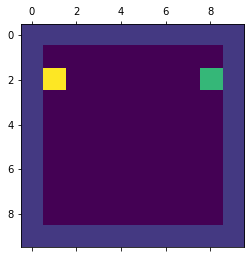

<Figure size 720x720 with 0 Axes>

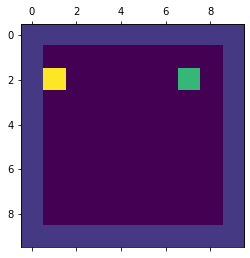

<Figure size 720x720 with 0 Axes>

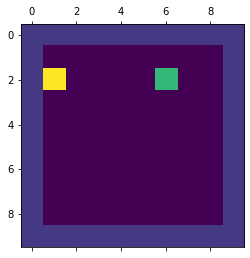

<Figure size 720x720 with 0 Axes>

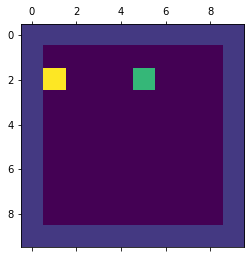

<Figure size 720x720 with 0 Axes>

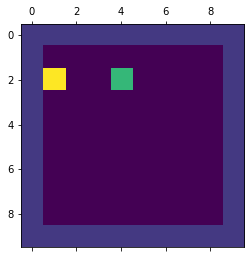

<Figure size 720x720 with 0 Axes>

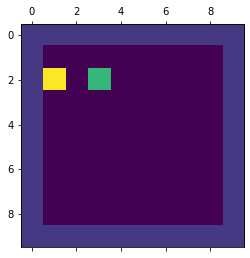

<Figure size 720x720 with 0 Axes>

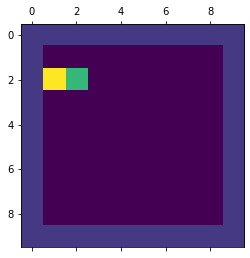

<Figure size 720x720 with 0 Axes>

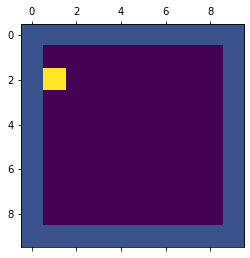

In [17]:
model = PPO1.load("../models/keep/{}".format(model_name))

obs = env.reset()
for _ in range(200):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()
    if done is True:
        break